Многослойная нейронная сеть для классификации. Лосев Владислав, ФН12-21м. Вариант 6

In [1]:
import torch
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import numpy as np
import matplotlib .pyplot as plt
import torch.nn as nn
X = torch.rand(1500, 2)
Y = (((2*X[:, 0]-0.7)**3)-(X[:, 1]-0.1) < -0.4).float()
Y = Y.view(-1, 1)

In [3]:
Y

tensor([[0.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]])

In [5]:
X.shape

torch.Size([1500, 2])

Проверим, доступна ли cuda или вычисления будут на cpu?

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Визуализируем исходные данные

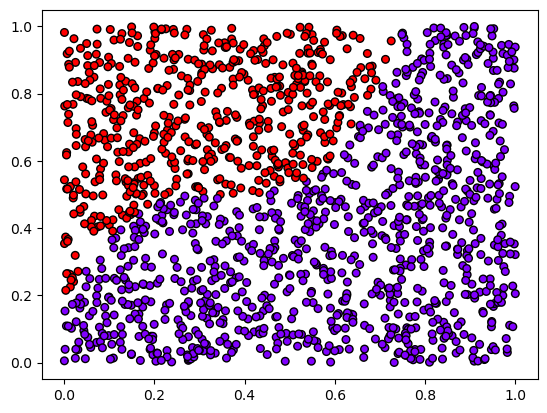

In [3]:

plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c =  Y.numpy()[:, 0],
           s=30, cmap='rainbow', edgecolors='black') 

Зададим нейросеть в виде класса

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()

        self.fc1 = nn.Linear(2, 200)
        self.act1 = nn.ReLU() 

        self.fc2 = nn.Linear(200, 1)
        self.act2 = nn.Sigmoid() 


    def forward(self, x):

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

Реализуем функцию обучения

In [5]:
def train(model, X, y, criterion, optimizer, num_epoch):

    
    for t in range(num_epoch):
                
        y_pred = model(X)

        loss = criterion(y_pred, y)

        loss.backward()
        
        optimizer.step()
        
        optimizer.zero_grad()
        print(f'epoch: {t}, curr_loss:  {loss}')

    return model

В качестве функции потерь возьмем MSE, а в качестве оптимизатора SGD

In [6]:
model = Net()


criterion = torch.nn.MSELoss()#BCE

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)#1e-1


Далее выполним обучение модели

In [7]:

model = train(model, X, Y, criterion, optimizer,3000)

epoch: 0, curr_loss:  0.2446264922618866
epoch: 1, curr_loss:  0.2384532243013382
epoch: 2, curr_loss:  0.2337017059326172
epoch: 3, curr_loss:  0.22991715371608734
epoch: 4, curr_loss:  0.22678837180137634
epoch: 5, curr_loss:  0.22410635650157928
epoch: 6, curr_loss:  0.22173163294792175
epoch: 7, curr_loss:  0.21957094967365265
epoch: 8, curr_loss:  0.2175617665052414
epoch: 9, curr_loss:  0.21566203236579895
epoch: 10, curr_loss:  0.2138432413339615
epoch: 11, curr_loss:  0.21208597719669342
epoch: 12, curr_loss:  0.2103770524263382
epoch: 13, curr_loss:  0.2087075263261795
epoch: 14, curr_loss:  0.20707108080387115
epoch: 15, curr_loss:  0.20546364784240723
epoch: 16, curr_loss:  0.20388227701187134
epoch: 17, curr_loss:  0.20232507586479187
epoch: 18, curr_loss:  0.2007906436920166
epoch: 19, curr_loss:  0.1992781162261963
epoch: 20, curr_loss:  0.1977868229150772
epoch: 21, curr_loss:  0.19631630182266235
epoch: 22, curr_loss:  0.19486622512340546
epoch: 23, curr_loss:  0.193436

epoch: 216, curr_loss:  0.09351646155118942
epoch: 217, curr_loss:  0.09334257245063782
epoch: 218, curr_loss:  0.09316986799240112
epoch: 219, curr_loss:  0.09299835562705994
epoch: 220, curr_loss:  0.09282796084880829
epoch: 221, curr_loss:  0.09265872091054916
epoch: 222, curr_loss:  0.09249061346054077
epoch: 223, curr_loss:  0.09232361614704132
epoch: 224, curr_loss:  0.09215771406888962
epoch: 225, curr_loss:  0.09199290722608566
epoch: 226, curr_loss:  0.09182919561862946
epoch: 227, curr_loss:  0.0916665568947792
epoch: 228, curr_loss:  0.09150497615337372
epoch: 229, curr_loss:  0.09134446084499359
epoch: 230, curr_loss:  0.09118495881557465
epoch: 231, curr_loss:  0.09102649241685867
epoch: 232, curr_loss:  0.09086903929710388
epoch: 233, curr_loss:  0.09071256220340729
epoch: 234, curr_loss:  0.09055710583925247
epoch: 235, curr_loss:  0.09040264785289764
epoch: 236, curr_loss:  0.09024916589260101
epoch: 237, curr_loss:  0.09009663760662079
epoch: 238, curr_loss:  0.0899450

epoch: 439, curr_loss:  0.07118306308984756
epoch: 440, curr_loss:  0.07112488150596619
epoch: 441, curr_loss:  0.07106693089008331
epoch: 442, curr_loss:  0.07100915908813477
epoch: 443, curr_loss:  0.07095161080360413
epoch: 444, curr_loss:  0.0708942711353302
epoch: 445, curr_loss:  0.07083713263273239
epoch: 446, curr_loss:  0.07078021764755249
epoch: 447, curr_loss:  0.07072348892688751
epoch: 448, curr_loss:  0.07066695392131805
epoch: 449, curr_loss:  0.07061063498258591
epoch: 450, curr_loss:  0.07055451720952988
epoch: 451, curr_loss:  0.07049858570098877
epoch: 452, curr_loss:  0.07044284790754318
epoch: 453, curr_loss:  0.07038731127977371
epoch: 454, curr_loss:  0.07033196836709976
epoch: 455, curr_loss:  0.07027681916952133
epoch: 456, curr_loss:  0.07022185623645782
epoch: 457, curr_loss:  0.07016709446907043
epoch: 458, curr_loss:  0.07011252641677856
epoch: 459, curr_loss:  0.07005814462900162
epoch: 460, curr_loss:  0.0700039491057396
epoch: 461, curr_loss:  0.06994995

epoch: 664, curr_loss:  0.06182755157351494
epoch: 665, curr_loss:  0.06179767847061157
epoch: 666, curr_loss:  0.061767883598804474
epoch: 667, curr_loss:  0.061738159507513046
epoch: 668, curr_loss:  0.06170850247144699
epoch: 669, curr_loss:  0.061678919941186905
epoch: 670, curr_loss:  0.061649397015571594
epoch: 671, curr_loss:  0.06161996349692345
epoch: 672, curr_loss:  0.061590585857629776
epoch: 673, curr_loss:  0.06156130135059357
epoch: 674, curr_loss:  0.061532072722911835
epoch: 675, curr_loss:  0.06150291860103607
epoch: 676, curr_loss:  0.06147383153438568
epoch: 677, curr_loss:  0.06144481524825096
epoch: 678, curr_loss:  0.061415862292051315
epoch: 679, curr_loss:  0.06138697639107704
epoch: 680, curr_loss:  0.06135816499590874
epoch: 681, curr_loss:  0.06132940575480461
epoch: 682, curr_loss:  0.061300721019506454
epoch: 683, curr_loss:  0.06127211079001427
epoch: 684, curr_loss:  0.06124354898929596
epoch: 685, curr_loss:  0.06121506914496422
epoch: 686, curr_loss:  

epoch: 891, curr_loss:  0.056466080248355865
epoch: 892, curr_loss:  0.05644727498292923
epoch: 893, curr_loss:  0.056428518146276474
epoch: 894, curr_loss:  0.05640977621078491
epoch: 895, curr_loss:  0.056391071528196335
epoch: 896, curr_loss:  0.056372396647930145
epoch: 897, curr_loss:  0.05635376647114754
epoch: 898, curr_loss:  0.05633515864610672
epoch: 899, curr_loss:  0.05631658062338829
epoch: 900, curr_loss:  0.05629803612828255
epoch: 901, curr_loss:  0.05627952143549919
epoch: 902, curr_loss:  0.05626103654503822
epoch: 903, curr_loss:  0.05624258518218994
epoch: 904, curr_loss:  0.056224167346954346
epoch: 905, curr_loss:  0.05620577558875084
epoch: 906, curr_loss:  0.05618741735816002
epoch: 907, curr_loss:  0.056169092655181885
epoch: 908, curr_loss:  0.05615079775452614
epoch: 909, curr_loss:  0.05613252893090248
epoch: 910, curr_loss:  0.056114282459020615
epoch: 911, curr_loss:  0.05609608441591263
epoch: 912, curr_loss:  0.056077904999256134
epoch: 913, curr_loss:  

epoch: 1112, curr_loss:  0.05296536907553673
epoch: 1113, curr_loss:  0.05295200273394585
epoch: 1114, curr_loss:  0.05293865501880646
epoch: 1115, curr_loss:  0.05292532965540886
epoch: 1116, curr_loss:  0.05291202664375305
epoch: 1117, curr_loss:  0.05289873853325844
epoch: 1118, curr_loss:  0.05288546904921532
epoch: 1119, curr_loss:  0.05287221819162369
epoch: 1120, curr_loss:  0.052858978509902954
epoch: 1121, curr_loss:  0.05284576490521431
epoch: 1122, curr_loss:  0.05283255875110626
epoch: 1123, curr_loss:  0.052819374948740005
epoch: 1124, curr_loss:  0.05280621349811554
epoch: 1125, curr_loss:  0.052793070673942566
epoch: 1126, curr_loss:  0.05277993902564049
epoch: 1127, curr_loss:  0.0527668297290802
epoch: 1128, curr_loss:  0.052753739058971405
epoch: 1129, curr_loss:  0.052740663290023804
epoch: 1130, curr_loss:  0.0527275986969471
epoch: 1131, curr_loss:  0.05271456763148308
epoch: 1132, curr_loss:  0.052701547741889954
epoch: 1133, curr_loss:  0.05268854647874832
epoch:

epoch: 1327, curr_loss:  0.05045345053076744
epoch: 1328, curr_loss:  0.050443217158317566
epoch: 1329, curr_loss:  0.05043298751115799
epoch: 1330, curr_loss:  0.05042276531457901
epoch: 1331, curr_loss:  0.05041256174445152
epoch: 1332, curr_loss:  0.05040236562490463
epoch: 1333, curr_loss:  0.05039219185709953
epoch: 1334, curr_loss:  0.05038202553987503
epoch: 1335, curr_loss:  0.05037187039852142
epoch: 1336, curr_loss:  0.05036173015832901
epoch: 1337, curr_loss:  0.050351593643426895
epoch: 1338, curr_loss:  0.050341472029685974
epoch: 1339, curr_loss:  0.05033136159181595
epoch: 1340, curr_loss:  0.05032125487923622
epoch: 1341, curr_loss:  0.05031116306781769
epoch: 1342, curr_loss:  0.05030108615756035
epoch: 1343, curr_loss:  0.050291016697883606
epoch: 1344, curr_loss:  0.05028095096349716
epoch: 1345, curr_loss:  0.05027090013027191
epoch: 1346, curr_loss:  0.050260864198207855
epoch: 1347, curr_loss:  0.05025085061788559
epoch: 1348, curr_loss:  0.05024084448814392
epoch

epoch: 1542, curr_loss:  0.04848005250096321
epoch: 1543, curr_loss:  0.04847181215882301
epoch: 1544, curr_loss:  0.048463571816682816
epoch: 1545, curr_loss:  0.04845535382628441
epoch: 1546, curr_loss:  0.048447128385305405
epoch: 1547, curr_loss:  0.048438917845487595
epoch: 1548, curr_loss:  0.04843071103096008
epoch: 1549, curr_loss:  0.04842250421643257
epoch: 1550, curr_loss:  0.04841431602835655
epoch: 1551, curr_loss:  0.04840613156557083
epoch: 1552, curr_loss:  0.04839795455336571
epoch: 1553, curr_loss:  0.04838979244232178
epoch: 1554, curr_loss:  0.04838162660598755
epoch: 1555, curr_loss:  0.04837346822023392
epoch: 1556, curr_loss:  0.04836532473564148
epoch: 1557, curr_loss:  0.04835718125104904
epoch: 1558, curr_loss:  0.0483490452170372
epoch: 1559, curr_loss:  0.04834091663360596
epoch: 1560, curr_loss:  0.04833279922604561
epoch: 1561, curr_loss:  0.04832468181848526
epoch: 1562, curr_loss:  0.04831656441092491
epoch: 1563, curr_loss:  0.04830846190452576
epoch: 1

epoch: 1758, curr_loss:  0.04685291647911072
epoch: 1759, curr_loss:  0.046846017241477966
epoch: 1760, curr_loss:  0.04683913663029671
epoch: 1761, curr_loss:  0.04683224856853485
epoch: 1762, curr_loss:  0.0468253567814827
epoch: 1763, curr_loss:  0.046818479895591736
epoch: 1764, curr_loss:  0.046811603009700775
epoch: 1765, curr_loss:  0.04680473729968071
epoch: 1766, curr_loss:  0.046797871589660645
epoch: 1767, curr_loss:  0.046791017055511475
epoch: 1768, curr_loss:  0.0467841662466526
epoch: 1769, curr_loss:  0.04677731171250343
epoch: 1770, curr_loss:  0.04677047207951546
epoch: 1771, curr_loss:  0.04676363617181778
epoch: 1772, curr_loss:  0.0467568002641201
epoch: 1773, curr_loss:  0.04674996808171272
epoch: 1774, curr_loss:  0.04674314707517624
epoch: 1775, curr_loss:  0.04673633351922035
epoch: 1776, curr_loss:  0.04672952741384506
epoch: 1777, curr_loss:  0.04672272130846977
epoch: 1778, curr_loss:  0.04671591520309448
epoch: 1779, curr_loss:  0.04670912027359009
epoch: 1

epoch: 1962, curr_loss:  0.04554791748523712
epoch: 1963, curr_loss:  0.045541997998952866
epoch: 1964, curr_loss:  0.04553608223795891
epoch: 1965, curr_loss:  0.04553016275167465
epoch: 1966, curr_loss:  0.04552425071597099
epoch: 1967, curr_loss:  0.04551834240555763
epoch: 1968, curr_loss:  0.04551244154572487
epoch: 1969, curr_loss:  0.045506551861763
epoch: 1970, curr_loss:  0.04550065100193024
epoch: 1971, curr_loss:  0.045494772493839264
epoch: 1972, curr_loss:  0.045488886535167694
epoch: 1973, curr_loss:  0.04548301175236702
epoch: 1974, curr_loss:  0.04547713324427605
epoch: 1975, curr_loss:  0.04547126218676567
epoch: 1976, curr_loss:  0.04546540230512619
epoch: 1977, curr_loss:  0.04545954242348671
epoch: 1978, curr_loss:  0.045453693717718124
epoch: 1979, curr_loss:  0.04544784501194954
epoch: 1980, curr_loss:  0.04544200748205185
epoch: 1981, curr_loss:  0.04543616250157356
epoch: 1982, curr_loss:  0.04543032869696617
epoch: 1983, curr_loss:  0.04542449489235878
epoch: 1

epoch: 2167, curr_loss:  0.0444144643843174
epoch: 2168, curr_loss:  0.04440928250551224
epoch: 2169, curr_loss:  0.04440411552786827
epoch: 2170, curr_loss:  0.04439893737435341
epoch: 2171, curr_loss:  0.044393766671419144
epoch: 2172, curr_loss:  0.04438859969377518
epoch: 2173, curr_loss:  0.04438343271613121
epoch: 2174, curr_loss:  0.04437827691435814
epoch: 2175, curr_loss:  0.04437311366200447
epoch: 2176, curr_loss:  0.0443679615855217
epoch: 2177, curr_loss:  0.04436280205845833
epoch: 2178, curr_loss:  0.04435765743255615
epoch: 2179, curr_loss:  0.04435250163078308
epoch: 2180, curr_loss:  0.044347357004880905
epoch: 2181, curr_loss:  0.04434221237897873
epoch: 2182, curr_loss:  0.04433707520365715
epoch: 2183, curr_loss:  0.04433194547891617
epoch: 2184, curr_loss:  0.044326819479465485
epoch: 2185, curr_loss:  0.044321686029434204
epoch: 2186, curr_loss:  0.04431656002998352
epoch: 2187, curr_loss:  0.044311437755823135
epoch: 2188, curr_loss:  0.04430631548166275
epoch: 

epoch: 2381, curr_loss:  0.04337523505091667
epoch: 2382, curr_loss:  0.043370697647333145
epoch: 2383, curr_loss:  0.04336614906787872
epoch: 2384, curr_loss:  0.0433616116642952
epoch: 2385, curr_loss:  0.04335708171129227
epoch: 2386, curr_loss:  0.04335254430770874
epoch: 2387, curr_loss:  0.04334801062941551
epoch: 2388, curr_loss:  0.04334348440170288
epoch: 2389, curr_loss:  0.04333895817399025
epoch: 2390, curr_loss:  0.04333443194627762
epoch: 2391, curr_loss:  0.04332991689443588
epoch: 2392, curr_loss:  0.04332539811730385
epoch: 2393, curr_loss:  0.04332088306546211
epoch: 2394, curr_loss:  0.043316371738910675
epoch: 2395, curr_loss:  0.04331186041235924
epoch: 2396, curr_loss:  0.0433073528110981
epoch: 2397, curr_loss:  0.043302856385707855
epoch: 2398, curr_loss:  0.04329835623502731
epoch: 2399, curr_loss:  0.04329386353492737
epoch: 2400, curr_loss:  0.043289367109537125
epoch: 2401, curr_loss:  0.04328487813472748
epoch: 2402, curr_loss:  0.04328038543462753
epoch: 2

epoch: 2564, curr_loss:  0.04258519783616066
epoch: 2565, curr_loss:  0.04258109629154205
epoch: 2566, curr_loss:  0.04257699102163315
epoch: 2567, curr_loss:  0.04257288947701454
epoch: 2568, curr_loss:  0.042568787932395935
epoch: 2569, curr_loss:  0.04256469011306763
epoch: 2570, curr_loss:  0.04256058856844902
epoch: 2571, curr_loss:  0.04255649819970131
epoch: 2572, curr_loss:  0.0425524078309536
epoch: 2573, curr_loss:  0.04254831373691559
epoch: 2574, curr_loss:  0.042544227093458176
epoch: 2575, curr_loss:  0.04254014417529106
epoch: 2576, curr_loss:  0.04253605753183365
epoch: 2577, curr_loss:  0.042531970888376236
epoch: 2578, curr_loss:  0.04252788797020912
epoch: 2579, curr_loss:  0.042523812502622604
epoch: 2580, curr_loss:  0.042519740760326385
epoch: 2581, curr_loss:  0.04251566529273987
epoch: 2582, curr_loss:  0.04251158982515335
epoch: 2583, curr_loss:  0.04250751808285713
epoch: 2584, curr_loss:  0.04250345379114151
epoch: 2585, curr_loss:  0.04249938577413559
epoch:

epoch: 2747, curr_loss:  0.04186635836958885
epoch: 2748, curr_loss:  0.041862603276968
epoch: 2749, curr_loss:  0.04185884818434715
epoch: 2750, curr_loss:  0.0418550968170166
epoch: 2751, curr_loss:  0.04185134544968605
epoch: 2752, curr_loss:  0.041847601532936096
epoch: 2753, curr_loss:  0.04184385761618614
epoch: 2754, curr_loss:  0.041840117424726486
epoch: 2755, curr_loss:  0.04183637350797653
epoch: 2756, curr_loss:  0.04183264076709747
epoch: 2757, curr_loss:  0.04182889685034752
epoch: 2758, curr_loss:  0.04182516783475876
epoch: 2759, curr_loss:  0.0418214313685894
epoch: 2760, curr_loss:  0.04181769862771034
epoch: 2761, curr_loss:  0.04181397333741188
epoch: 2762, curr_loss:  0.04181024804711342
epoch: 2763, curr_loss:  0.04180652275681496
epoch: 2764, curr_loss:  0.041802797466516495
epoch: 2765, curr_loss:  0.04179907590150833
epoch: 2766, curr_loss:  0.04179536551237106
epoch: 2767, curr_loss:  0.0417916402220726
epoch: 2768, curr_loss:  0.04178792983293533
epoch: 2769,

epoch: 2940, curr_loss:  0.0411735400557518
epoch: 2941, curr_loss:  0.04117009416222572
epoch: 2942, curr_loss:  0.04116665571928024
epoch: 2943, curr_loss:  0.041163209825754166
epoch: 2944, curr_loss:  0.041159771382808685
epoch: 2945, curr_loss:  0.0411563366651535
epoch: 2946, curr_loss:  0.04115289822220802
epoch: 2947, curr_loss:  0.04114946350455284
epoch: 2948, curr_loss:  0.04114603251218796
epoch: 2949, curr_loss:  0.041142597794532776
epoch: 2950, curr_loss:  0.04113916680216789
epoch: 2951, curr_loss:  0.04113573580980301
epoch: 2952, curr_loss:  0.04113231226801872
epoch: 2953, curr_loss:  0.041128888726234436
epoch: 2954, curr_loss:  0.04112546890974045
epoch: 2955, curr_loss:  0.04112204909324646
epoch: 2956, curr_loss:  0.04111862555146217
epoch: 2957, curr_loss:  0.04111521318554878
epoch: 2958, curr_loss:  0.04111179709434509
epoch: 2959, curr_loss:  0.0411083810031414
epoch: 2960, curr_loss:  0.04110496863722801
epoch: 2961, curr_loss:  0.04110155627131462
epoch: 29

Посмотрим на предсказания и на полученный результат

In [8]:
with torch.no_grad():
    nn_prediction = model(X)
 



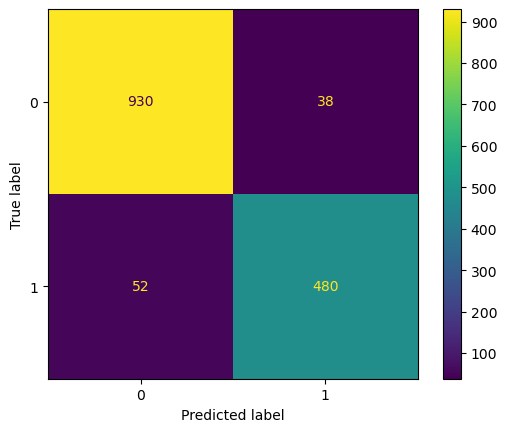

In [9]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])
cm = confusion_matrix(Y, nn_prediction, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

Воспользуемся различными метриками качества

In [10]:
accuracy_score(Y,nn_prediction)

0.94

In [11]:
f1_score(Y,nn_prediction)

0.9142857142857143

еще один из вариантов

In [12]:
#model2 = nn.Sequential(
#                   nn.Linear(2, 50, bias=True),
 #                  nn.ReLU(),
#                   nn.Linear(50, 100, bias=True),
#                   nn.ReLU(),
#                   nn.Linear(100, 1, bias=True),
#                   nn.Sigmoid()
#                   )

In [13]:
#criterion = torch.nn.L1Loss()

#optimizer = torch.optim.SGD(model2.parameters(), lr=1e-2)
#model2 = train(model2, X, Y, criterion, optimizer, 2500)

In [14]:
#with torch.no_grad():
 #   nn_prediction = model2(X)

Теперь реализуем второй вариант функции обучения с использованием dataloader и разделения данных на батчи

In [15]:
train_loader = torch.utils.data.DataLoader(list(zip(X, Y)), batch_size=150, shuffle=True)


Также будем использовать библиотеку tqdm для визуализации прогресса обучения

In [16]:
import tqdm
from tqdm.auto import tqdm

def train_batch(model, loader, criterion, optimizer, num_epoch):

    
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам 
        for X_batch, y_batch in loader:
            
            y_pred = model(X_batch)

            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

          
            loss.backward()
            
            optimizer.step()
            
            optimizer.zero_grad()

        print('batch: ',t," curr_loss:", np.mean(epoch_loss))

    return model

In [17]:
model3  = Net()
#можно попробовать исп вариант из model4

criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model3.parameters(), lr=1e-2)


In [18]:
model3 = train_batch(model3, train_loader, criterion, optimizer, 2500)

  0%|          | 0/2500 [00:00<?, ?it/s]

batch:  0  curr_loss: 0.23747472763061522
batch:  1  curr_loss: 0.22576560378074645
batch:  2  curr_loss: 0.2188498318195343
batch:  3  curr_loss: 0.21408053785562514
batch:  4  curr_loss: 0.21022989004850387
batch:  5  curr_loss: 0.20676839500665664
batch:  6  curr_loss: 0.20358878821134568
batch:  7  curr_loss: 0.20053645670413972
batch:  8  curr_loss: 0.19763239473104477
batch:  9  curr_loss: 0.1947507843375206
batch:  10  curr_loss: 0.19197302609682082
batch:  11  curr_loss: 0.18930455893278123
batch:  12  curr_loss: 0.18667474687099456
batch:  13  curr_loss: 0.18415694832801818
batch:  14  curr_loss: 0.1816501423716545
batch:  15  curr_loss: 0.17925697714090347
batch:  16  curr_loss: 0.17690968811511992
batch:  17  curr_loss: 0.17464862912893295
batch:  18  curr_loss: 0.1724696785211563
batch:  19  curr_loss: 0.17028572261333466
batch:  20  curr_loss: 0.1681784212589264
batch:  21  curr_loss: 0.16615381687879563
batch:  22  curr_loss: 0.16420948058366774
batch:  23  curr_loss: 0.1

batch:  195  curr_loss: 0.07489664815366268
batch:  196  curr_loss: 0.07477723509073257
batch:  197  curr_loss: 0.07464374005794525
batch:  198  curr_loss: 0.0744942594319582
batch:  199  curr_loss: 0.07436588481068611
batch:  200  curr_loss: 0.0742389976978302
batch:  201  curr_loss: 0.07409399449825287
batch:  202  curr_loss: 0.07398672513663769
batch:  203  curr_loss: 0.07384038455784321
batch:  204  curr_loss: 0.07370956316590309
batch:  205  curr_loss: 0.07357746548950672
batch:  206  curr_loss: 0.07345173880457878
batch:  207  curr_loss: 0.07333382070064545
batch:  208  curr_loss: 0.07321597337722778
batch:  209  curr_loss: 0.07309529110789299
batch:  210  curr_loss: 0.07295862212777138
batch:  211  curr_loss: 0.07286464683711529
batch:  212  curr_loss: 0.07271629869937897
batch:  213  curr_loss: 0.07259104549884796
batch:  214  curr_loss: 0.072469637170434
batch:  215  curr_loss: 0.07235230170190335
batch:  216  curr_loss: 0.07224288247525693
batch:  217  curr_loss: 0.0721255257

batch:  388  curr_loss: 0.05963300764560699
batch:  389  curr_loss: 0.05958826616406441
batch:  390  curr_loss: 0.059541159123182294
batch:  391  curr_loss: 0.05950768068432808
batch:  392  curr_loss: 0.05946192555129528
batch:  393  curr_loss: 0.0593976829200983
batch:  394  curr_loss: 0.05935033634305
batch:  395  curr_loss: 0.059311628341674805
batch:  396  curr_loss: 0.059263326972723004
batch:  397  curr_loss: 0.05922273695468903
batch:  398  curr_loss: 0.05917717516422272
batch:  399  curr_loss: 0.05913480073213577
batch:  400  curr_loss: 0.05909048356115818
batch:  401  curr_loss: 0.05904479064047337
batch:  402  curr_loss: 0.0589987687766552
batch:  403  curr_loss: 0.05895344130694866
batch:  404  curr_loss: 0.05892262980341911
batch:  405  curr_loss: 0.05888182111084461
batch:  406  curr_loss: 0.05882778763771057
batch:  407  curr_loss: 0.05877896249294281
batch:  408  curr_loss: 0.05873361639678478
batch:  409  curr_loss: 0.058690095692873
batch:  410  curr_loss: 0.0586519908

batch:  580  curr_loss: 0.05311192572116852
batch:  581  curr_loss: 0.05308125242590904
batch:  582  curr_loss: 0.05307350270450115
batch:  583  curr_loss: 0.0530424665659666
batch:  584  curr_loss: 0.053010177239775656
batch:  585  curr_loss: 0.05298539027571678
batch:  586  curr_loss: 0.05295564755797386
batch:  587  curr_loss: 0.05293013826012612
batch:  588  curr_loss: 0.052903857082128525
batch:  589  curr_loss: 0.052889274805784224
batch:  590  curr_loss: 0.05285914391279221
batch:  591  curr_loss: 0.05283023975789547
batch:  592  curr_loss: 0.05281483232975006
batch:  593  curr_loss: 0.05278524532914162
batch:  594  curr_loss: 0.05276660770177841
batch:  595  curr_loss: 0.05273874253034592
batch:  596  curr_loss: 0.0527124747633934
batch:  597  curr_loss: 0.052679864689707756
batch:  598  curr_loss: 0.05266462080180645
batch:  599  curr_loss: 0.05264061503112316
batch:  600  curr_loss: 0.05262753702700138
batch:  601  curr_loss: 0.05259524174034595
batch:  602  curr_loss: 0.0525

batch:  771  curr_loss: 0.0491922102868557
batch:  772  curr_loss: 0.04918317273259163
batch:  773  curr_loss: 0.049160251021385194
batch:  774  curr_loss: 0.049146384745836255
batch:  775  curr_loss: 0.04912913329899311
batch:  776  curr_loss: 0.049114326015114784
batch:  777  curr_loss: 0.049093544483184814
batch:  778  curr_loss: 0.04908771589398384
batch:  779  curr_loss: 0.049063651263713835
batch:  780  curr_loss: 0.04904859401285648
batch:  781  curr_loss: 0.04904068969190121
batch:  782  curr_loss: 0.04902813397347927
batch:  783  curr_loss: 0.04899535588920116
batch:  784  curr_loss: 0.048981507495045665
batch:  785  curr_loss: 0.04896381497383118
batch:  786  curr_loss: 0.048943455889821054
batch:  787  curr_loss: 0.048931682482361794
batch:  788  curr_loss: 0.04892236366868019
batch:  789  curr_loss: 0.04890245571732521
batch:  790  curr_loss: 0.048888158053159714
batch:  791  curr_loss: 0.0488717719912529
batch:  792  curr_loss: 0.04886529464274645
batch:  793  curr_loss: 0

batch:  958  curr_loss: 0.04655294641852379
batch:  959  curr_loss: 0.04654439650475979
batch:  960  curr_loss: 0.046528325974941255
batch:  961  curr_loss: 0.046511878818273546
batch:  962  curr_loss: 0.046507961302995685
batch:  963  curr_loss: 0.04650729820132256
batch:  964  curr_loss: 0.04648227542638779
batch:  965  curr_loss: 0.04647238366305828
batch:  966  curr_loss: 0.046455439925193784
batch:  967  curr_loss: 0.04644743781536818
batch:  968  curr_loss: 0.0464292760938406
batch:  969  curr_loss: 0.046422820538282394
batch:  970  curr_loss: 0.04640734829008579
batch:  971  curr_loss: 0.04639133829623461
batch:  972  curr_loss: 0.04638078808784485
batch:  973  curr_loss: 0.046380890533328056
batch:  974  curr_loss: 0.04635763540863991
batch:  975  curr_loss: 0.04636083878576756
batch:  976  curr_loss: 0.04632838331162929
batch:  977  curr_loss: 0.046324266493320464
batch:  978  curr_loss: 0.046306485496461394
batch:  979  curr_loss: 0.04630384333431721
batch:  980  curr_loss: 0

batch:  1145  curr_loss: 0.044550520554184916
batch:  1146  curr_loss: 0.04454988241195679
batch:  1147  curr_loss: 0.04453600980341434
batch:  1148  curr_loss: 0.044518840685486796
batch:  1149  curr_loss: 0.04452117756009102
batch:  1150  curr_loss: 0.04450045786798
batch:  1151  curr_loss: 0.04450559131801128
batch:  1152  curr_loss: 0.04448378421366215
batch:  1153  curr_loss: 0.044477390870451924
batch:  1154  curr_loss: 0.04447878710925579
batch:  1155  curr_loss: 0.04445651974529028
batch:  1156  curr_loss: 0.04445352368056774
batch:  1157  curr_loss: 0.04443885497748852
batch:  1158  curr_loss: 0.04443245865404606
batch:  1159  curr_loss: 0.04441891741007566
batch:  1160  curr_loss: 0.04441144242882729
batch:  1161  curr_loss: 0.044400757551193236
batch:  1162  curr_loss: 0.044393866509199145
batch:  1163  curr_loss: 0.04439248032867908
batch:  1164  curr_loss: 0.04438202902674675
batch:  1165  curr_loss: 0.04436397459357977
batch:  1166  curr_loss: 0.04436553046107292
batch:  

batch:  1332  curr_loss: 0.04298031628131867
batch:  1333  curr_loss: 0.04296552576124668
batch:  1334  curr_loss: 0.042953277751803395
batch:  1335  curr_loss: 0.04294360242784023
batch:  1336  curr_loss: 0.04293875955045223
batch:  1337  curr_loss: 0.04294861033558846
batch:  1338  curr_loss: 0.042918891087174414
batch:  1339  curr_loss: 0.04292270205914974
batch:  1340  curr_loss: 0.04291917309165001
batch:  1341  curr_loss: 0.04289984814822674
batch:  1342  curr_loss: 0.042898237332701684
batch:  1343  curr_loss: 0.042884480021893975
batch:  1344  curr_loss: 0.042887172847986224
batch:  1345  curr_loss: 0.042875171452760694
batch:  1346  curr_loss: 0.042873212695121767
batch:  1347  curr_loss: 0.04285248294472695
batch:  1348  curr_loss: 0.04285589009523392
batch:  1349  curr_loss: 0.04284541197121143
batch:  1350  curr_loss: 0.04283241853117943
batch:  1351  curr_loss: 0.04283078815788031
batch:  1352  curr_loss: 0.04282443355768919
batch:  1353  curr_loss: 0.04281188845634461
bat

batch:  1517  curr_loss: 0.04165975991636515
batch:  1518  curr_loss: 0.041653316281735894
batch:  1519  curr_loss: 0.041665830463171
batch:  1520  curr_loss: 0.04165310226380825
batch:  1521  curr_loss: 0.04163156114518642
batch:  1522  curr_loss: 0.04163361266255379
batch:  1523  curr_loss: 0.041618891060352325
batch:  1524  curr_loss: 0.04163266271352768
batch:  1525  curr_loss: 0.04161057230085134
batch:  1526  curr_loss: 0.04160223882645368
batch:  1527  curr_loss: 0.041593958251178266
batch:  1528  curr_loss: 0.04158984273672104
batch:  1529  curr_loss: 0.04158043004572391
batch:  1530  curr_loss: 0.041575563699007036
batch:  1531  curr_loss: 0.041571135818958285
batch:  1532  curr_loss: 0.04157404713332653
batch:  1533  curr_loss: 0.04155975393950939
batch:  1534  curr_loss: 0.04154752939939499
batch:  1535  curr_loss: 0.04155051503330469
batch:  1536  curr_loss: 0.04154478292912245
batch:  1537  curr_loss: 0.04152555428445339
batch:  1538  curr_loss: 0.041520930081605914
batch:

batch:  1702  curr_loss: 0.04051617234945297
batch:  1703  curr_loss: 0.040509574860334394
batch:  1704  curr_loss: 0.040501789189875126
batch:  1705  curr_loss: 0.04049979466944933
batch:  1706  curr_loss: 0.04049438573420048
batch:  1707  curr_loss: 0.04049272481352091
batch:  1708  curr_loss: 0.040485812723636626
batch:  1709  curr_loss: 0.040471605211496356
batch:  1710  curr_loss: 0.040473504737019536
batch:  1711  curr_loss: 0.040471526235342024
batch:  1712  curr_loss: 0.04046628642827273
batch:  1713  curr_loss: 0.04045347776263952
batch:  1714  curr_loss: 0.040455385111272335
batch:  1715  curr_loss: 0.040443341434001925
batch:  1716  curr_loss: 0.04043202456086874
batch:  1717  curr_loss: 0.040427835658192635
batch:  1718  curr_loss: 0.040427271462976935
batch:  1719  curr_loss: 0.04042432978749275
batch:  1720  curr_loss: 0.04042023681104183
batch:  1721  curr_loss: 0.040408930741250515
batch:  1722  curr_loss: 0.04041137024760246
batch:  1723  curr_loss: 0.04039775207638740

batch:  1884  curr_loss: 0.03951429314911366
batch:  1885  curr_loss: 0.03950741291046143
batch:  1886  curr_loss: 0.039500072970986365
batch:  1887  curr_loss: 0.03949858136475086
batch:  1888  curr_loss: 0.03949391301721335
batch:  1889  curr_loss: 0.039488036185503006
batch:  1890  curr_loss: 0.039487266726791856
batch:  1891  curr_loss: 0.039477862417697906
batch:  1892  curr_loss: 0.039470655657351014
batch:  1893  curr_loss: 0.03946755155920982
batch:  1894  curr_loss: 0.03946040775626898
batch:  1895  curr_loss: 0.03946219813078642
batch:  1896  curr_loss: 0.03946023136377334
batch:  1897  curr_loss: 0.039450830034911635
batch:  1898  curr_loss: 0.039451295882463454
batch:  1899  curr_loss: 0.03943891953676939
batch:  1900  curr_loss: 0.039430171996355054
batch:  1901  curr_loss: 0.03941898494958877
batch:  1902  curr_loss: 0.0394147977232933
batch:  1903  curr_loss: 0.03941250629723072
batch:  1904  curr_loss: 0.039409094303846356
batch:  1905  curr_loss: 0.03940015770494938
ba

batch:  2069  curr_loss: 0.03860636241734028
batch:  2070  curr_loss: 0.038580243848264216
batch:  2071  curr_loss: 0.038584350049495696
batch:  2072  curr_loss: 0.03857003301382065
batch:  2073  curr_loss: 0.03858024291694164
batch:  2074  curr_loss: 0.03857289906591177
batch:  2075  curr_loss: 0.038565818779170515
batch:  2076  curr_loss: 0.038556205481290816
batch:  2077  curr_loss: 0.03856783751398325
batch:  2078  curr_loss: 0.03854929674416781
batch:  2079  curr_loss: 0.038541401363909246
batch:  2080  curr_loss: 0.038539760559797284
batch:  2081  curr_loss: 0.03853339944034815
batch:  2082  curr_loss: 0.03852519765496254
batch:  2083  curr_loss: 0.038519341684877875
batch:  2084  curr_loss: 0.03851587940007448
batch:  2085  curr_loss: 0.0385267486795783
batch:  2086  curr_loss: 0.03850953187793493
batch:  2087  curr_loss: 0.038507528230547906
batch:  2088  curr_loss: 0.038503820449113844
batch:  2089  curr_loss: 0.03849006313830614
batch:  2090  curr_loss: 0.03849323280155659
ba

batch:  2254  curr_loss: 0.03775511495769024
batch:  2255  curr_loss: 0.0377492306753993
batch:  2256  curr_loss: 0.03775352407246828
batch:  2257  curr_loss: 0.037737449258565904
batch:  2258  curr_loss: 0.03773684948682785
batch:  2259  curr_loss: 0.03774151615798473
batch:  2260  curr_loss: 0.03772800993174315
batch:  2261  curr_loss: 0.037731115333735944
batch:  2262  curr_loss: 0.03772131819278002
batch:  2263  curr_loss: 0.03772290218621492
batch:  2264  curr_loss: 0.03771287892013788
batch:  2265  curr_loss: 0.03770373146981001
batch:  2266  curr_loss: 0.0377077579498291
batch:  2267  curr_loss: 0.03770172987133265
batch:  2268  curr_loss: 0.03769551571458578
batch:  2269  curr_loss: 0.03769599813967943
batch:  2270  curr_loss: 0.037684101797640326
batch:  2271  curr_loss: 0.037695173919200894
batch:  2272  curr_loss: 0.03767401594668627
batch:  2273  curr_loss: 0.037671332433819774
batch:  2274  curr_loss: 0.03767356500029564
batch:  2275  curr_loss: 0.03767225313931703
batch: 

batch:  2443  curr_loss: 0.03696952257305384
batch:  2444  curr_loss: 0.03696608655154705
batch:  2445  curr_loss: 0.03697265200316906
batch:  2446  curr_loss: 0.0369524946436286
batch:  2447  curr_loss: 0.036954117193818095
batch:  2448  curr_loss: 0.03696545455604792
batch:  2449  curr_loss: 0.036948795430362225
batch:  2450  curr_loss: 0.036947226896882054
batch:  2451  curr_loss: 0.036936819180846216
batch:  2452  curr_loss: 0.03693503402173519
batch:  2453  curr_loss: 0.036934201605618
batch:  2454  curr_loss: 0.036924277804791926
batch:  2455  curr_loss: 0.036927358619868754
batch:  2456  curr_loss: 0.03692756034433842
batch:  2457  curr_loss: 0.03691674135625363
batch:  2458  curr_loss: 0.03690359927713871
batch:  2459  curr_loss: 0.03691248763352632
batch:  2460  curr_loss: 0.03690324500203133
batch:  2461  curr_loss: 0.0368984904140234
batch:  2462  curr_loss: 0.03689827676862478
batch:  2463  curr_loss: 0.03689394909888506
batch:  2464  curr_loss: 0.0368862247094512
batch:  2

In [19]:
with torch.no_grad():
    nn_prediction = model3(X)

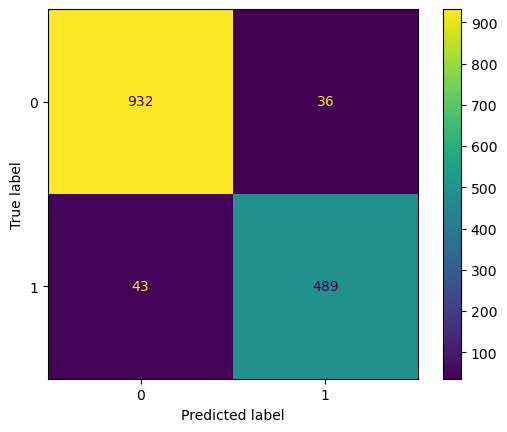

In [20]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])
cm = confusion_matrix(Y, nn_prediction, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

Теперь в качестве оптимизатора будем использовать Adam и посмотрим на результат работы алгоритма

##### 

In [21]:
model4 = nn.Sequential(
                   
        torch.nn.Linear(2, 30),
 
    torch.nn.Sigmoid(),
    torch.nn.Linear(30, 1),
    torch.nn.Sigmoid()
 )

In [22]:
criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model4.parameters(), lr=0.1)

In [23]:
train(model4, X,Y, criterion, optimizer, 2500)

epoch: 0, curr_loss:  0.26647061109542847
epoch: 1, curr_loss:  0.26162734627723694
epoch: 2, curr_loss:  0.2752209007740021
epoch: 3, curr_loss:  0.25948500633239746
epoch: 4, curr_loss:  0.2315835803747177
epoch: 5, curr_loss:  0.21937601268291473
epoch: 6, curr_loss:  0.2314913123846054
epoch: 7, curr_loss:  0.23117348551750183
epoch: 8, curr_loss:  0.2144811600446701
epoch: 9, curr_loss:  0.200675368309021
epoch: 10, curr_loss:  0.19718988239765167
epoch: 11, curr_loss:  0.19625887274742126
epoch: 12, curr_loss:  0.19013549387454987
epoch: 13, curr_loss:  0.17751678824424744
epoch: 14, curr_loss:  0.16239476203918457
epoch: 15, curr_loss:  0.15083520114421844
epoch: 16, curr_loss:  0.1444225013256073
epoch: 17, curr_loss:  0.13745883107185364
epoch: 18, curr_loss:  0.1256377100944519
epoch: 19, curr_loss:  0.11207173019647598
epoch: 20, curr_loss:  0.10195579379796982
epoch: 21, curr_loss:  0.09584619849920273
epoch: 22, curr_loss:  0.09023348242044449
epoch: 23, curr_loss:  0.0829

epoch: 249, curr_loss:  0.013936814852058887
epoch: 250, curr_loss:  0.01388225145637989
epoch: 251, curr_loss:  0.013828346505761147
epoch: 252, curr_loss:  0.013775093480944633
epoch: 253, curr_loss:  0.013722465373575687
epoch: 254, curr_loss:  0.01367045845836401
epoch: 255, curr_loss:  0.013619053177535534
epoch: 256, curr_loss:  0.013568236492574215
epoch: 257, curr_loss:  0.013517995364964008
epoch: 258, curr_loss:  0.013468317687511444
epoch: 259, curr_loss:  0.013419185765087605
epoch: 260, curr_loss:  0.01337059773504734
epoch: 261, curr_loss:  0.01332253310829401
epoch: 262, curr_loss:  0.013274986296892166
epoch: 263, curr_loss:  0.013227940537035465
epoch: 264, curr_loss:  0.013181389309465885
epoch: 265, curr_loss:  0.013135319575667381
epoch: 266, curr_loss:  0.013089723885059357
epoch: 267, curr_loss:  0.013044590130448341
epoch: 268, curr_loss:  0.012999908067286015
epoch: 269, curr_loss:  0.012955673038959503
epoch: 270, curr_loss:  0.01291186735033989
epoch: 271, cur

epoch: 489, curr_loss:  0.007707938551902771
epoch: 490, curr_loss:  0.007693035062402487
epoch: 491, curr_loss:  0.007678168825805187
epoch: 492, curr_loss:  0.007663340773433447
epoch: 493, curr_loss:  0.007648544851690531
epoch: 494, curr_loss:  0.007633787114173174
epoch: 495, curr_loss:  0.007619060110300779
epoch: 496, curr_loss:  0.007604372687637806
epoch: 497, curr_loss:  0.007589714135974646
epoch: 498, curr_loss:  0.007575094234198332
epoch: 499, curr_loss:  0.007560505997389555
epoch: 500, curr_loss:  0.007545951753854752
epoch: 501, curr_loss:  0.007531431969255209
epoch: 502, curr_loss:  0.007516944780945778
epoch: 503, curr_loss:  0.007502491120249033
epoch: 504, curr_loss:  0.00748806819319725
epoch: 505, curr_loss:  0.007473677396774292
epoch: 506, curr_loss:  0.00745932012796402
epoch: 507, curr_loss:  0.007444997318089008
epoch: 508, curr_loss:  0.007430706173181534
epoch: 509, curr_loss:  0.007416442967951298
epoch: 510, curr_loss:  0.00740221468731761
epoch: 511, c

epoch: 717, curr_loss:  0.004963310901075602
epoch: 718, curr_loss:  0.004953630268573761
epoch: 719, curr_loss:  0.004943967796862125
epoch: 720, curr_loss:  0.004934324417263269
epoch: 721, curr_loss:  0.004924701061099768
epoch: 722, curr_loss:  0.0049150967970490456
epoch: 723, curr_loss:  0.004905511625111103
epoch: 724, curr_loss:  0.0048959446139633656
epoch: 725, curr_loss:  0.00488639809191227
epoch: 726, curr_loss:  0.00487687299028039
epoch: 727, curr_loss:  0.00486736511811614
epoch: 728, curr_loss:  0.004857879132032394
epoch: 729, curr_loss:  0.0048484099097549915
epoch: 730, curr_loss:  0.00483896117657423
epoch: 731, curr_loss:  0.004829532001167536
epoch: 732, curr_loss:  0.004820122383534908
epoch: 733, curr_loss:  0.004810729529708624
epoch: 734, curr_loss:  0.0048013608902692795
epoch: 735, curr_loss:  0.0047920094802975655
epoch: 736, curr_loss:  0.004782678559422493
epoch: 737, curr_loss:  0.004773363936692476
epoch: 738, curr_loss:  0.004764072597026825
epoch: 73

epoch: 905, curr_loss:  0.00348291196860373
epoch: 906, curr_loss:  0.003476745681837201
epoch: 907, curr_loss:  0.0034705931320786476
epoch: 908, curr_loss:  0.0034644585102796555
epoch: 909, curr_loss:  0.0034583352971822023
epoch: 910, curr_loss:  0.0034522286150604486
epoch: 911, curr_loss:  0.003446135902777314
epoch: 912, curr_loss:  0.0034400601871311665
epoch: 913, curr_loss:  0.0034339986741542816
epoch: 914, curr_loss:  0.0034279527608305216
epoch: 915, curr_loss:  0.003421919187530875
epoch: 916, curr_loss:  0.0034159014467149973
epoch: 917, curr_loss:  0.0034098965115845203
epoch: 918, curr_loss:  0.003403907176107168
epoch: 919, curr_loss:  0.0033979322761297226
epoch: 920, curr_loss:  0.003391972975805402
epoch: 921, curr_loss:  0.003386026481166482
epoch: 922, curr_loss:  0.0033800965175032616
epoch: 923, curr_loss:  0.00337417796254158
epoch: 924, curr_loss:  0.0033682752400636673
epoch: 925, curr_loss:  0.0033623853232711554
epoch: 926, curr_loss:  0.003356508677825331

epoch: 1131, curr_loss:  0.002396421507000923
epoch: 1132, curr_loss:  0.002392680151388049
epoch: 1133, curr_loss:  0.002388948341831565
epoch: 1134, curr_loss:  0.0023852218873798847
epoch: 1135, curr_loss:  0.002381501719355583
epoch: 1136, curr_loss:  0.0023777878377586603
epoch: 1137, curr_loss:  0.0023740814067423344
epoch: 1138, curr_loss:  0.0023703810293227434
epoch: 1139, curr_loss:  0.002366686938330531
epoch: 1140, curr_loss:  0.002362999366596341
epoch: 1141, curr_loss:  0.0023593222722411156
epoch: 1142, curr_loss:  0.002355648437514901
epoch: 1143, curr_loss:  0.002351982519030571
epoch: 1144, curr_loss:  0.0023483210243284702
epoch: 1145, curr_loss:  0.0023446676786988974
epoch: 1146, curr_loss:  0.002341021317988634
epoch: 1147, curr_loss:  0.002337381010875106
epoch: 1148, curr_loss:  0.0023337467573583126
epoch: 1149, curr_loss:  0.0023301185574382544
epoch: 1150, curr_loss:  0.002326495246961713
epoch: 1151, curr_loss:  0.0023228817153722048
epoch: 1152, curr_loss: 

epoch: 1344, curr_loss:  0.0017292255070060492
epoch: 1345, curr_loss:  0.001726600923575461
epoch: 1346, curr_loss:  0.0017239830922335386
epoch: 1347, curr_loss:  0.001721368171274662
epoch: 1348, curr_loss:  0.0017187574412673712
epoch: 1349, curr_loss:  0.001716150902211666
epoch: 1350, curr_loss:  0.001713547040708363
epoch: 1351, curr_loss:  0.0017109501641243696
epoch: 1352, curr_loss:  0.0017083557322621346
epoch: 1353, curr_loss:  0.0017057630466297269
epoch: 1354, curr_loss:  0.0017031767638400197
epoch: 1355, curr_loss:  0.0017005943227559328
epoch: 1356, curr_loss:  0.001698015257716179
epoch: 1357, curr_loss:  0.0016954399179667234
epoch: 1358, curr_loss:  0.00169286853633821
epoch: 1359, curr_loss:  0.0016903021605685353
epoch: 1360, curr_loss:  0.001687738113105297
epoch: 1361, curr_loss:  0.001685180002823472
epoch: 1362, curr_loss:  0.001682623871602118
epoch: 1363, curr_loss:  0.0016800716985017061
epoch: 1364, curr_loss:  0.0016775252297520638
epoch: 1365, curr_loss:

epoch: 1533, curr_loss:  0.001304606324993074
epoch: 1534, curr_loss:  0.0013027305249124765
epoch: 1535, curr_loss:  0.0013008571695536375
epoch: 1536, curr_loss:  0.0012989892857149243
epoch: 1537, curr_loss:  0.0012971230316907167
epoch: 1538, curr_loss:  0.001295260852202773
epoch: 1539, curr_loss:  0.0012934033293277025
epoch: 1540, curr_loss:  0.001291549182496965
epoch: 1541, curr_loss:  0.0012896968983113766
epoch: 1542, curr_loss:  0.0012878485722467303
epoch: 1543, curr_loss:  0.0012860075803473592
epoch: 1544, curr_loss:  0.0012841668212786317
epoch: 1545, curr_loss:  0.0012823290890082717
epoch: 1546, curr_loss:  0.001280494499951601
epoch: 1547, curr_loss:  0.0012786645675078034
epoch: 1548, curr_loss:  0.0012768389424309134
epoch: 1549, curr_loss:  0.0012750152964144945
epoch: 1550, curr_loss:  0.0012731979368254542
epoch: 1551, curr_loss:  0.0012713794130831957
epoch: 1552, curr_loss:  0.0012695668265223503
epoch: 1553, curr_loss:  0.0012677584309130907
epoch: 1554, curr

epoch: 1758, curr_loss:  0.000960291363298893
epoch: 1759, curr_loss:  0.0009590426925569773
epoch: 1760, curr_loss:  0.000957771553657949
epoch: 1761, curr_loss:  0.0009564922656863928
epoch: 1762, curr_loss:  0.0009552196133881807
epoch: 1763, curr_loss:  0.0009539562743157148
epoch: 1764, curr_loss:  0.0009527136571705341
epoch: 1765, curr_loss:  0.0009514908888377249
epoch: 1766, curr_loss:  0.0009502801694907248
epoch: 1767, curr_loss:  0.0009490802185609937
epoch: 1768, curr_loss:  0.0009478856809437275
epoch: 1769, curr_loss:  0.000946688640397042
epoch: 1770, curr_loss:  0.0009454856626689434
epoch: 1771, curr_loss:  0.0009442757582291961
epoch: 1772, curr_loss:  0.0009430651552975178
epoch: 1773, curr_loss:  0.0009418497211299837
epoch: 1774, curr_loss:  0.0009406358585692942
epoch: 1775, curr_loss:  0.0009394253138452768
epoch: 1776, curr_loss:  0.0009382216376252472
epoch: 1777, curr_loss:  0.0009370259358547628
epoch: 1778, curr_loss:  0.0009358346578665078
epoch: 1779, cur

epoch: 1953, curr_loss:  0.0007563180988654494
epoch: 1954, curr_loss:  0.0007554391049779952
epoch: 1955, curr_loss:  0.0007545599946752191
epoch: 1956, curr_loss:  0.0007536853081546724
epoch: 1957, curr_loss:  0.0007528109708800912
epoch: 1958, curr_loss:  0.0007519368082284927
epoch: 1959, curr_loss:  0.0007510651485063136
epoch: 1960, curr_loss:  0.0007501961663365364
epoch: 1961, curr_loss:  0.0007493286393582821
epoch: 1962, curr_loss:  0.0007484598318114877
epoch: 1963, curr_loss:  0.0007475932943634689
epoch: 1964, curr_loss:  0.0007467293762601912
epoch: 1965, curr_loss:  0.0007458656909875572
epoch: 1966, curr_loss:  0.0007450043340213597
epoch: 1967, curr_loss:  0.0007441439665853977
epoch: 1968, curr_loss:  0.0007432851707562804
epoch: 1969, curr_loss:  0.0007424278883263469
epoch: 1970, curr_loss:  0.0007415725267492235
epoch: 1971, curr_loss:  0.0007407173980027437
epoch: 1972, curr_loss:  0.0007398654706776142
epoch: 1973, curr_loss:  0.0007390131941065192
epoch: 1974, 

epoch: 2151, curr_loss:  0.0006075852434150875
epoch: 2152, curr_loss:  0.0006069473456591368
epoch: 2153, curr_loss:  0.0006063110777176917
epoch: 2154, curr_loss:  0.000605675159022212
epoch: 2155, curr_loss:  0.000605042208917439
epoch: 2156, curr_loss:  0.0006044084439054132
epoch: 2157, curr_loss:  0.0006037780549377203
epoch: 2158, curr_loss:  0.0006031473749317229
epoch: 2159, curr_loss:  0.0006025162292644382
epoch: 2160, curr_loss:  0.0006018852582201362
epoch: 2161, curr_loss:  0.0006012566154822707
epoch: 2162, curr_loss:  0.0006006289040669799
epoch: 2163, curr_loss:  0.0006000010762363672
epoch: 2164, curr_loss:  0.0005993769154883921
epoch: 2165, curr_loss:  0.0005987492622807622
epoch: 2166, curr_loss:  0.00059812719700858
epoch: 2167, curr_loss:  0.0005975022213533521
epoch: 2168, curr_loss:  0.0005968810874037445
epoch: 2169, curr_loss:  0.000596259837038815
epoch: 2170, curr_loss:  0.0005956407985650003
epoch: 2171, curr_loss:  0.0005950218182988465
epoch: 2172, curr_

epoch: 2350, curr_loss:  0.0004978870274499059
epoch: 2351, curr_loss:  0.0004974117036908865
epoch: 2352, curr_loss:  0.0004969379515387118
epoch: 2353, curr_loss:  0.0004964653053320944
epoch: 2354, curr_loss:  0.0004959918442182243
epoch: 2355, curr_loss:  0.0004955196636728942
epoch: 2356, curr_loss:  0.0004950480652041733
epoch: 2357, curr_loss:  0.0004945778637193143
epoch: 2358, curr_loss:  0.0004941084189340472
epoch: 2359, curr_loss:  0.0004936375771649182
epoch: 2360, curr_loss:  0.0004931701114401221
epoch: 2361, curr_loss:  0.0004927023546770215
epoch: 2362, curr_loss:  0.0004922348307445645
epoch: 2363, curr_loss:  0.0004917688202112913
epoch: 2364, curr_loss:  0.0004913027514703572
epoch: 2365, curr_loss:  0.0004908361588604748
epoch: 2366, curr_loss:  0.0004903718363493681
epoch: 2367, curr_loss:  0.0004899062914773822
epoch: 2368, curr_loss:  0.0004894437734037638
epoch: 2369, curr_loss:  0.0004889814299531281
epoch: 2370, curr_loss:  0.0004885197267867625
epoch: 2371, 

Sequential(
  (0): Linear(in_features=2, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=1, bias=True)
  (3): Sigmoid()
)

In [24]:
with torch.no_grad():
    nn_prediction = model4(X)

In [25]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

Посмотрим метрики обучения, выведем результат для сравнения и confusion matrix

In [26]:
accuracy_score(Y,nn_prediction)

1.0

In [27]:
f1_score(Y,nn_prediction)

1.0

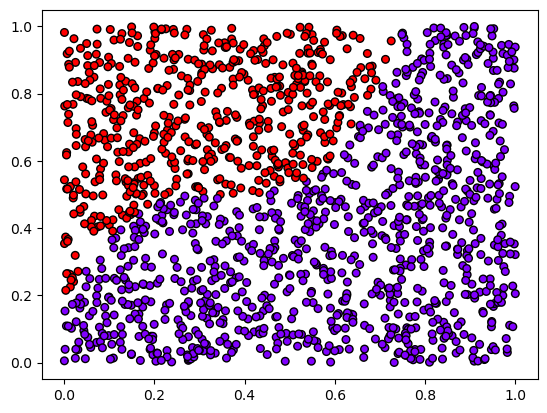

In [28]:
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c =  nn_prediction,
           s=30, cmap='rainbow', edgecolors='black') 

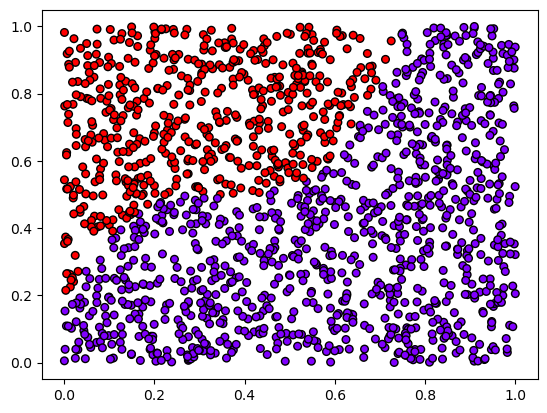

In [29]:
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c =  Y.numpy()[:, 0],
           s=30, cmap='rainbow', edgecolors='black') 

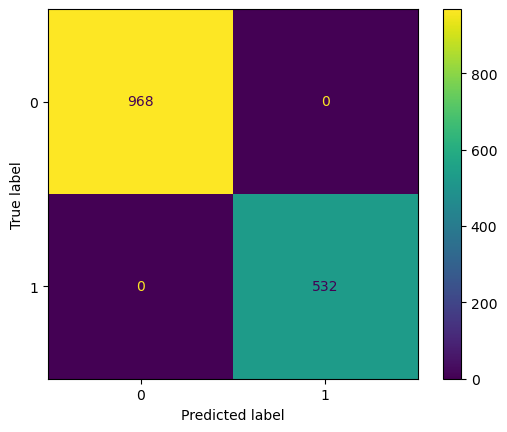

In [30]:
cm = confusion_matrix(Y, nn_prediction, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

Получаем точную классификацию